In [1]:
library("cowplot")
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(parallel))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(stringr))

In [9]:
df<-read.csv('01_Olink_Analysis/selected_protein_OverTime.csv')

In [10]:
df <- df %>% dplyr::mutate(`Age Group` = case_when(
  cohort.cohortGuid == "BR1" ~ "Young",
  cohort.cohortGuid == "BR2" ~ "Older",
  TRUE ~ NA_character_
))
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

`geom_smooth()` using formula = 'y ~ x'


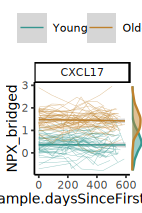

In [14]:
options(repr.plot.width = 30/25.4, repr.plot.height = 45/25.4)
p1 <- ggplot(df %>% filter(Assay=='CXCL17'),
            aes(sample.daysSinceFirstVisit, NPX_bridged,color=`Age Group`)) +
    geom_smooth(method="lm",se=TRUE, linewidth=0.3) + 
scale_color_manual(values = c("Older"='#bf812d',  "Young"='#35978f'))+
    theme_classic(base_size = 8) +
    theme(
          legend.position = "top",
          legend.title = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          strip.background = element_rect(linewidth = 0.5),
          axis.title.x = element_text(margin = margin(t = 2)))+
geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)), 
              linewidth=0.1, alpha=0.5,
              linetype =1)+facet_wrap(~Assay)

p2 <- ggplot(df %>% filter(Assay=='WNT9A'),aes(NPX_bridged, fill = `Age Group`, color = `Age Group`)) +
    geom_density(alpha = 0.5,linewidth=0.5) +
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    coord_flip() +
    theme_void(base_size=8) +
    theme(legend.position = "none")+ theme(plot.margin = margin(0, 0, 0, -1, "mm"))

# Combine the plots
combined_plot <- plot_grid(p1, p2, ncol = 2, rel_widths = c(10, 0.4), align = 'h', axis = 'tb')
combined_plot
ggsave(filename = "FigureC-1.pdf", plot = combined_plot, width = 30/25.4, height = 45/25.4)

`geom_smooth()` using formula = 'y ~ x'


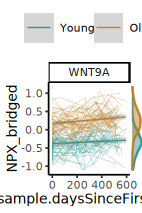

In [15]:
options(repr.plot.width = 30/25.4, repr.plot.height = 45/25.4)
p1 <- ggplot(df %>% filter(Assay=='WNT9A'),
            aes(sample.daysSinceFirstVisit, NPX_bridged,color=`Age Group`)) +
    geom_smooth(method="lm",se=TRUE, linewidth=0.3) + 
scale_color_manual(values = c("Older"='#bf812d',  "Young"='#35978f'))+
    theme_classic(base_size = 8) +
    theme(
          legend.position = "top",
          legend.title = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          strip.background = element_rect(linewidth = 0.5),
          axis.title.x = element_text(margin = margin(t = 2)))+
geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)), 
              linewidth=0.1, alpha=0.5,
              linetype =1)+facet_wrap(~Assay)

p2 <- ggplot(df %>% filter(Assay=='WNT9A'),aes(NPX_bridged, fill = `Age Group`, color = `Age Group`)) +
    geom_density(alpha = 0.5,linewidth=0.5) +
    scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
    coord_flip() +
    theme_void(base_size=8) +
    theme(legend.position = "none")+ theme(plot.margin = margin(0, 0, 0, -1, "mm"))

# Combine the plots
combined_plot <- plot_grid(p1, p2, ncol = 2, rel_widths = c(10, 0.4), align = 'h', axis = 'tb')
combined_plot
ggsave(filename = "FigureC-2.pdf", plot = combined_plot, width = 32/25.4, height = 45/25.4)